**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [3]:
y_pred

array([1])

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


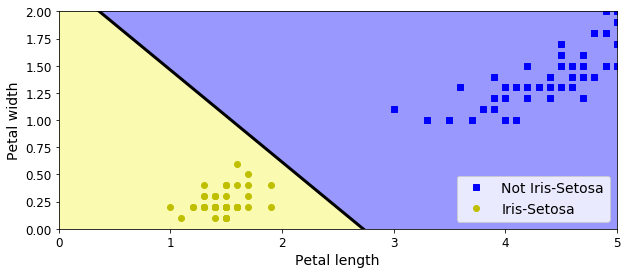

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

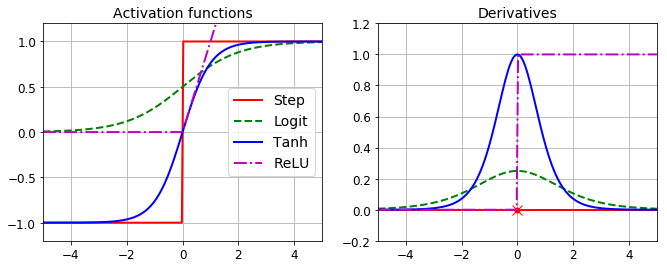

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

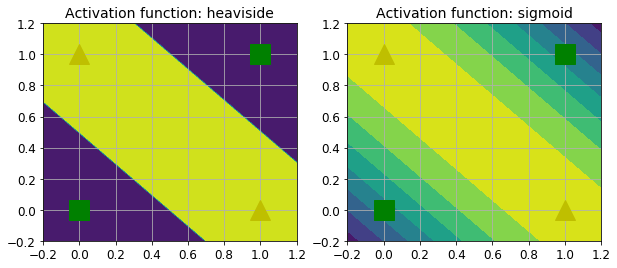

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpcx9fbi8i', '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_master': '', '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_environment': 'local', '_is_chief': True, '_task_type': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0d2e7bd080>, '_session_config': None, '_tf_random_seed': 42, '_task_id': 0}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpcx9fbi8i/model.ckpt.
INFO:tensorflow:step = 1, loss = 2.40058
INFO:tensorflow:global_step/sec: 152.938
INFO:tensorflow:step = 101, loss = 0.312676 (0.656 sec)
INFO:tensorflow:global_step/sec: 15

INFO:tensorflow:step = 7201, loss = 0.0637505 (0.800 sec)
INFO:tensorflow:global_step/sec: 128.206
INFO:tensorflow:step = 7301, loss = 0.0100674 (0.780 sec)
INFO:tensorflow:global_step/sec: 123.054
INFO:tensorflow:step = 7401, loss = 0.0119402 (0.811 sec)
INFO:tensorflow:global_step/sec: 121.887
INFO:tensorflow:step = 7501, loss = 0.0071494 (0.821 sec)
INFO:tensorflow:global_step/sec: 127.683
INFO:tensorflow:step = 7601, loss = 0.0144672 (0.784 sec)
INFO:tensorflow:global_step/sec: 127.32
INFO:tensorflow:step = 7701, loss = 0.00783077 (0.784 sec)
INFO:tensorflow:global_step/sec: 127.105
INFO:tensorflow:step = 7801, loss = 0.00411331 (0.788 sec)
INFO:tensorflow:global_step/sec: 126.407
INFO:tensorflow:step = 7901, loss = 0.0049301 (0.791 sec)
INFO:tensorflow:global_step/sec: 125.295
INFO:tensorflow:step = 8001, loss = 0.00255629 (0.798 sec)
INFO:tensorflow:global_step/sec: 124.842
INFO:tensorflow:step = 8101, loss = 0.00630931 (0.801 sec)
INFO:tensorflow:global_step/sec: 125.124
INFO:te

INFO:tensorflow:step = 15401, loss = 0.0024438 (0.798 sec)
INFO:tensorflow:global_step/sec: 123.825
INFO:tensorflow:step = 15501, loss = 0.00588934 (0.807 sec)
INFO:tensorflow:global_step/sec: 126.286
INFO:tensorflow:step = 15601, loss = 0.00370753 (0.792 sec)
INFO:tensorflow:global_step/sec: 126.701
INFO:tensorflow:step = 15701, loss = 0.00562607 (0.791 sec)
INFO:tensorflow:global_step/sec: 126.574
INFO:tensorflow:step = 15801, loss = 0.000760298 (0.790 sec)
INFO:tensorflow:global_step/sec: 125.85
INFO:tensorflow:step = 15901, loss = 0.000996803 (0.795 sec)
INFO:tensorflow:global_step/sec: 124.46
INFO:tensorflow:step = 16001, loss = 0.00627456 (0.801 sec)
INFO:tensorflow:global_step/sec: 126.485
INFO:tensorflow:step = 16101, loss = 0.00245455 (0.792 sec)
INFO:tensorflow:global_step/sec: 124.994
INFO:tensorflow:step = 16201, loss = 0.000144312 (0.799 sec)
INFO:tensorflow:global_step/sec: 125.043
INFO:tensorflow:step = 16301, loss = 0.00264761 (0.800 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 124.929
INFO:tensorflow:step = 23601, loss = 0.000621165 (0.804 sec)
INFO:tensorflow:global_step/sec: 124.529
INFO:tensorflow:step = 23701, loss = 0.000114354 (0.801 sec)
INFO:tensorflow:global_step/sec: 125.709
INFO:tensorflow:step = 23801, loss = 0.000812038 (0.795 sec)
INFO:tensorflow:global_step/sec: 126.31
INFO:tensorflow:step = 23901, loss = 0.0018832 (0.792 sec)
INFO:tensorflow:global_step/sec: 126.686
INFO:tensorflow:step = 24001, loss = 0.00129283 (0.790 sec)
INFO:tensorflow:global_step/sec: 125.479
INFO:tensorflow:step = 24101, loss = 0.000674389 (0.797 sec)
INFO:tensorflow:global_step/sec: 123.796
INFO:tensorflow:step = 24201, loss = 0.00171795 (0.808 sec)
INFO:tensorflow:global_step/sec: 124.521
INFO:tensorflow:step = 24301, loss = 0.000283654 (0.801 sec)
INFO:tensorflow:global_step/sec: 126.949
INFO:tensorflow:step = 24401, loss = 0.00207332 (0.788 sec)
INFO:tensorflow:global_step/sec: 125.758
INFO:tensorflow:step = 24501, loss = 0.00103486

INFO:tensorflow:global_step/sec: 126.381
INFO:tensorflow:step = 31701, loss = 0.000653895 (0.792 sec)
INFO:tensorflow:global_step/sec: 125.06
INFO:tensorflow:step = 31801, loss = 0.000165106 (0.800 sec)
INFO:tensorflow:global_step/sec: 126.732
INFO:tensorflow:step = 31901, loss = 0.00067247 (0.790 sec)
INFO:tensorflow:global_step/sec: 125.096
INFO:tensorflow:step = 32001, loss = 0.000113992 (0.798 sec)
INFO:tensorflow:global_step/sec: 127.507
INFO:tensorflow:step = 32101, loss = 0.000413013 (0.785 sec)
INFO:tensorflow:global_step/sec: 126.207
INFO:tensorflow:step = 32201, loss = 0.001139 (0.791 sec)
INFO:tensorflow:global_step/sec: 127.098
INFO:tensorflow:step = 32301, loss = 0.000693469 (0.788 sec)
INFO:tensorflow:global_step/sec: 127.224
INFO:tensorflow:step = 32401, loss = 0.000185415 (0.786 sec)
INFO:tensorflow:global_step/sec: 126.704
INFO:tensorflow:step = 32501, loss = 0.000349769 (0.789 sec)
INFO:tensorflow:global_step/sec: 128.535
INFO:tensorflow:step = 32601, loss = 0.0002461

INFO:tensorflow:global_step/sec: 125.985
INFO:tensorflow:step = 39801, loss = 0.001165 (0.794 sec)
INFO:tensorflow:global_step/sec: 128.795
INFO:tensorflow:step = 39901, loss = 0.000828519 (0.776 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /tmp/tmpcx9fbi8i/model.ckpt.
INFO:tensorflow:Loss for final step: 0.000386758.


SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpcx9fbi8i/model.ckpt-40000


0.98399999999999999

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.070705034121254312

## Using plain TensorFlow

In [14]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.9146
1 Train accuracy: 0.94 Val accuracy: 0.9352
2 Train accuracy: 0.92 Val accuracy: 0.9466
3 Train accuracy: 0.96 Val accuracy: 0.951
4 Train accuracy: 0.92 Val accuracy: 0.9586
5 Train accuracy: 0.94 Val accuracy: 0.958
6 Train accuracy: 0.98 Val accuracy: 0.9608
7 Train accuracy: 0.96 Val accuracy: 0.9636
8 Train accuracy: 0.92 Val accuracy: 0.9638
9 Train accuracy: 0.96 Val accuracy: 0.9648
10 Train accuracy: 0.98 Val accuracy: 0.9688
11 Train accuracy: 0.96 Val accuracy: 0.9686
12 Train accuracy: 1.0 Val accuracy: 0.9704
13 Train accuracy: 0.94 Val accuracy: 0.9686
14 Train accuracy: 1.0 Val accuracy: 0.9718
15 Train accuracy: 1.0 Val accuracy: 0.973
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 0.98 Val accuracy: 0.9736
18 Train accuracy: 1.0 Val accuracy: 0.9754
19 Train accuracy: 1.0 Val accuracy: 0.9748
20 Train accuracy: 0.98 Val accuracy: 0.9744
21 Train accuracy: 1.0 Val accuracy: 0.9748
22 Train accuracy: 1.0 Val accu

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [25]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [26]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [27]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [28]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [30]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9053
1 Train accuracy: 0.88 Test accuracy: 0.9206
2 Train accuracy: 0.94 Test accuracy: 0.9301
3 Train accuracy: 0.94 Test accuracy: 0.9397
4 Train accuracy: 0.92 Test accuracy: 0.9451
5 Train accuracy: 0.94 Test accuracy: 0.9476
6 Train accuracy: 0.92 Test accuracy: 0.9515
7 Train accuracy: 0.98 Test accuracy: 0.9546
8 Train accuracy: 0.96 Test accuracy: 0.9569
9 Train accuracy: 0.94 Test accuracy: 0.9605
10 Train accuracy: 0.92 Test accuracy: 0.9619
11 Train accuracy: 0.96 Test accuracy: 0.9631
12 Train accuracy: 1.0 Test accuracy: 0.9661
13 Train accuracy: 0.94 Test accuracy: 0.9657
14 Train accuracy: 1.0 Test accuracy: 0.9669
15 Train accuracy: 0.94 Test accuracy: 0.9682
16 Train accuracy: 0.96 Test accuracy: 0.9701
17 Train accuracy: 0.98 Test accuracy: 0.9696
18 Train accuracy: 1.0 Test accuracy: 0.97
19 Train accuracy: 1.0 Test accuracy: 0.971


In [36]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [37]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [39]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [40]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [41]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [44]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [45]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [46]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's `input_data()` function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define `X_valid` and `y_valid`:

In [47]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [48]:
m, n = X_train.shape

In [49]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.440% 	Loss: 0.35228
Epoch: 5 	Validation accuracy: 95.060% 	Loss: 0.17539
Epoch: 10 	Validation accuracy: 96.680% 	Loss: 0.12546
Epoch: 15 	Validation accuracy: 97.220% 	Loss: 0.10438
Epoch: 20 	Validation accuracy: 97.600% 	Loss: 0.08914
Epoch: 25 	Validation accuracy: 97.740% 	Loss: 0.08115
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07788
Epoch: 35 	Validation accuracy: 97.920% 	Loss: 0.07094
Epoch: 40 	Validation accuracy: 97.920% 	Loss: 0.06983
Epoch: 45 	Validation accuracy: 97.880% 	Loss: 0.06778
Epoch: 50 	Validation accuracy: 98.100% 	Loss: 0.06649
Epoch: 55 	Validation accuracy: 98.080% 	Loss: 0.06642
Epoch: 60 	Validation accuracy: 98.220% 	Loss: 0.06510
Epoch: 65 	Validation accuracy: 98.060% 	Loss: 0.06588
Epoch: 70 	Validation accuracy: 98.080% 	Loss: 0.06762
Epoch: 75 	Validation accuracy: 98.160% 	Loss: 0.06705
Epoch: 80 	Validation accuracy: 98.160% 	Loss: 0.06705
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.06709
Epoch: 90 	V

In [50]:
os.remove(checkpoint_epoch_path)

In [51]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [52]:
accuracy_val

0.97839999